In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('ad_stock_dummy.csv')

In [4]:
df.head(10)

,weeks,sales,stocks
0,1,"1,018",-
1,2,-,-
2,3,236,-
3,4,490,-
4,5,"1,760",-
5,6,443,-
6,7,"1,670",-
7,8,526,-
8,9,"4,522",-
9,10,"2,524",117.91


In [5]:
df['sales'] = df['sales'].str.replace(",","")
df['sales'] = df['sales'].str.strip()
df['sales'] = df['sales'].replace('-', 0)
df['sales'] = df['sales'].astype(int)

In [6]:
df['stocks'] = df['stocks'].str.strip()
df['stocks'] = df['stocks'].replace('-', 0)
df['stocks'] = df['stocks'].astype(float)

In [7]:
df.describe()

,weeks,sales,stocks
count,52.000000,52.000000,52.000000
mean,26.500000,2348.211538,53.954423
std,15.154757,1681.967922,59.486194
min,1.000000,0.000000,0.000000
25%,13.750000,1092.250000,0.000000
50%,26.500000,1892.000000,0.000000
75%,39.250000,3265.250000,109.915000
max,52.000000,7195.000000,177.090000


In [20]:
decay_rate = 0.8330
lag = 3

decay_stock = []
for i in range(len(df['weeks'])):
    if i+1 <= lag:
        decay_stock.append(df['stocks'][i])
    elif i+1 > lag:
        decay_stock.append(df['stocks'][i] + (0.8330 * decay_stock[i-1]))
        
df['decay_stock'] = decay_stock

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Areum.Jung\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


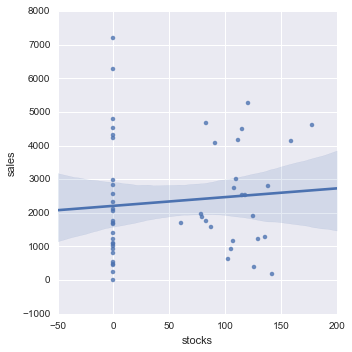

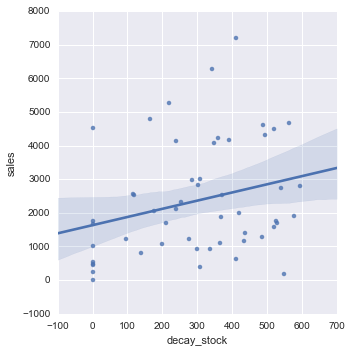

In [22]:
#plt.scatter(df['stocks'], df['sales'])
sns.lmplot(x='stocks', y='sales', data=df)
sns.lmplot(x='decay_stock', y='sales', data=df)

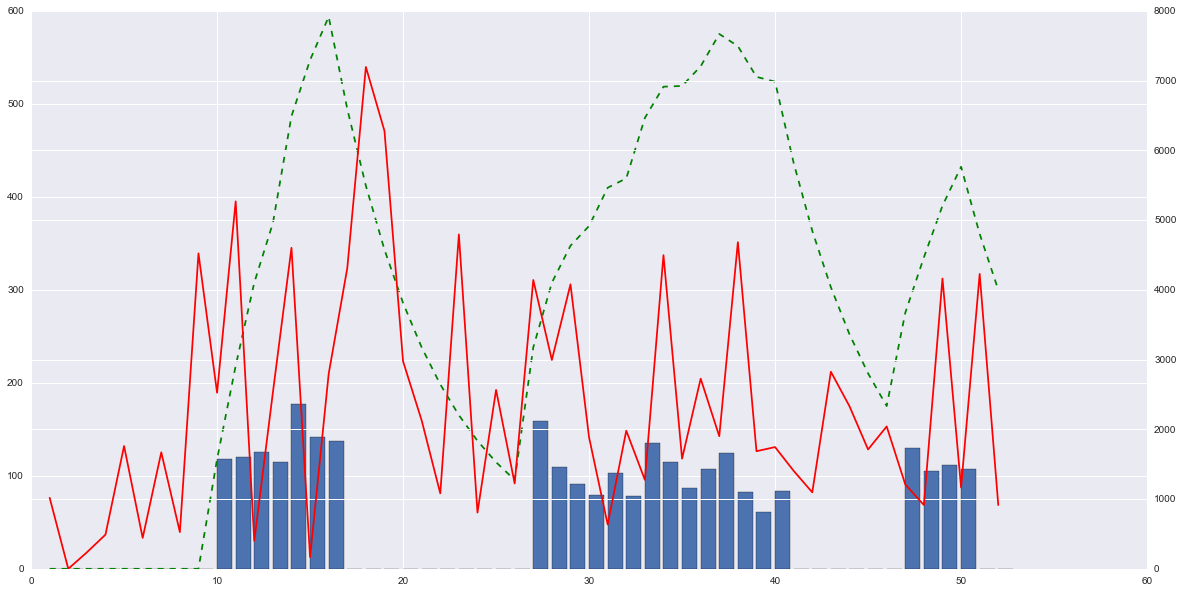

In [23]:
fig = plt.figure()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plot1 = ax.bar(df['weeks'], df['stocks'])
plot2 = ax.plot(df['weeks'], df['decay_stock'], '--', color='green')
ax2 = ax.twinx()
plot3 = ax2.plot(df['weeks'], df['sales'], '-', color='red')

In [24]:
#between Sales and Stocks / Sales and decay_stock

#slope coeff
#st.error of slope
#R-squared
#F-test overall
#Regression SS (SSE)

#Intecept Coeff
#St.error of intercept
#St. error of reression
#degress of freedom (n-k)
#Residual SS (SSE)

stock_slope, stock_intercept = np.polyfit(x=df['stocks'], y=df['sales'], deg=1)
decay_slope, decay_intercept = np.polyfit(x=df['decay_stock'], y=df['sales'], deg=1)

print('stock_slope:', stock_slope, 'stock_intercept:', stock_intercept)
print('decay_slope:', decay_slope, 'decay_intercept:', decay_intercept)

stock_slope: 2.59586917606 stock_intercept: 2208.15291468
decay_slope: 2.43171676996 decay_intercept: 1632.53999837


In [25]:
import statsmodels.formula.api as smf

In [26]:
print(smf.ols('sales ~ stocks', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.4250
Date:                Mon, 26 Feb 2018   Prob (F-statistic):              0.517
Time:                        16:40:39   Log-Likelihood:                -459.30
No. Observations:                  52   AIC:                             922.6
Df Residuals:                      50   BIC:                             926.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2208.1529    318.086      6.942      0.0

In [27]:
print(smf.ols('sales ~ decay_stock', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     3.921
Date:                Mon, 26 Feb 2018   Prob (F-statistic):             0.0532
Time:                        16:40:44   Log-Likelihood:                -457.56
No. Observations:                  52   AIC:                             919.1
Df Residuals:                      50   BIC:                             923.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    1632.5400    426.721      3.826      

In [16]:
print(smf.ols('sales ~ stocks+decay_stock', data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     2.115
Date:                Mon, 26 Feb 2018   Prob (F-statistic):              0.131
Time:                        16:35:31   Log-Likelihood:                -457.37
No. Observations:                  52   AIC:                             920.7
Df Residuals:                      49   BIC:                             926.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept    1629.1614    429.515      3.793      